In [4]:
import os, glob
sys.path.append('../')

import SimpleITK as sitk
import numpy as np

from radiomics import featureextractor

In [5]:
src = '/Users/giuseppefilitto/Pazienti_anonym_sorted'

patients = os.listdir(src)
if '.DS_Store' in patients:
    patients.remove('.DS_Store')
print(f"Number of patients: {len(patients)}")

Number of patients: 48


In [6]:
params  = '../extras/Params.yaml'
extractor = featureextractor.RadiomicsFeatureExtractor(params)

features = {}

for patient in patients:

    folders = glob.glob(src + '/' + patient + '/*_3D')
    
    res = [y for y in folders if '_resized' in y ]
    pred = [x.replace('_resized', '_predicted') for x in res ]
    
    for (x, y) in zip(res, pred):
        
        image = sitk.ReadImage(x + "/grayscale.nrrd")
        mask = sitk.ReadImage(y + "/segmented.nrrd")

        folder_name = os.path.split(x)[1]
        fold_prefix = folder_name.split('_')[0]

        
        
        features[patient, fold_prefix] = extractor.execute(image, mask)

In [7]:
import pickle

with open('../data/features/'  + 'features.pickle', 'wb') as file:
     pickle.dump(features, file)

In [8]:
dict_list = list(features)

print('NUMEBR OF CASE_ID: ', len(dict_list))
print(dict_list)

feature_names = list(sorted(filter ( lambda k: k.startswith("original_"), features[dict_list[0]] )))
print('NUMEBR OF FEATURES: ', len(feature_names))

NUMEBR OF CASE_ID:  50
[('BO77', 'T2'), ('BO48', 'T2'), ('BO47', 'T2'), ('BO78', 'T2'), ('BO40', 'T2AX'), ('BO76', 'T2'), ('BO82', 'T2'), ('BO49', 'T2'), ('BO85', 'T2'), ('BO71', 'T2'), ('BO2', 'T2AX'), ('BO54', 'T2'), ('BO31', 't2DEF'), ('BO36', 'T2AX'), ('BO38', 'T2AXAlta'), ('BO38', 'T2AXbassa'), ('BO64', 'T2'), ('BO90', 'T25mm'), ('BO63', 'T2'), ('BO52', 'T2'), ('BO39', 'T2AX'), ('BO37', 'T2AX'), ('BO74', 'T2'), ('BO45', 'T2'), ('BO42', 'T2AX'), ('BO29', 'T2AX'), ('BO16', 'T2AX'), ('BO11', 'T2AX'), ('BO18', 'T2AX'), ('BO43', 'T2AX'), ('BO44', 'T2AX'), ('BO86', 'T2'), ('BO72', 'T2'), ('BO75', 'T2'), ('BO26', 'T2AX'), ('BO28', 'T2AX'), ('BO17', 'T2AX'), ('BO9', 'T2AX'), ('BO1', 'T2AX'), ('BO35', 'T2AX'), ('BO32', 'T2AX'), ('BO68', 'T2'), ('BO50', 'T2'), ('BO66', 'T2'), ('BO61', 'T2'), ('BO33', 'T2AX'), ('BO60', 'T2'), ('BO51', 'T2'), ('BO56', 'T2'), ('BO56', 'T25mm')]
NUMEBR OF FEATURES:  100


In [9]:
samples = np.zeros((len(dict_list), len(feature_names)))

for k, case_id in enumerate(dict_list):
    a = np.array([])
    for feature_name in feature_names:
        a = np.append(a, features[case_id][feature_name])
    samples[k, ...] = a

#for possible NaNs
samples = np.nan_to_num(samples)

samples.shape

(50, 100)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [11]:
# Construct a pandas dataframe from the samples
d = pd.DataFrame(data=samples, columns=feature_names)

d.describe()

original_firstorder_10Percentile  original_firstorder_90Percentile  \
count                         50.000000                         50.000000   
mean                          28.122000                         90.188000   
std                           11.666615                         39.278314   
min                            1.000000                         27.000000   
25%                           23.000000                         62.150000   
50%                           27.350000                         78.000000   
75%                           34.975000                        111.050000   
max                           57.000000                        190.000000   

       original_firstorder_Energy  original_firstorder_Entropy  \
count                5.000000e+01                    50.000000   
mean                 2.934021e+06                     1.782579   
std                  3.505654e+06                     0.506590   
min                  3.146780e+05                     0.623921   
25%                  9.229780e+05                     1.470145   
50%                  1.712474e+06                     1.776456   
75%                  3.135541e+06                     2.194607   
max                  1.854636e+07                     2.675621   

       original_firstorder_InterquartileRange  original_firstorder_Kurtosis  \
count                                50.00000                     50.000000   
mean                                 33.67000                      4.053835   
std                                  22.00588                      2.405085   
min                                   8.00000                      1.376199   
25%                                  19.00000                      2.496778   
50%                                  25.50000                      3.638919   
75%                                  44.18750                      4.958215   
max                                 123.50000                     16.943389   

       original_firstorder_Maximum  original_firstorder_Mean  \
count                    50.000000                 50.000000   
mean                    132.460000                 55.220774   
std                      39.697432                 22.391242   
min                      47.000000                 17.278177   
25%                     103.250000                 40.883612   
50%                     142.000000                 51.068693   
75%                     161.500000                 66.979231   
max                     202.000000                113.633043   

       original_firstorder_MeanAbsoluteDeviation  original_firstorder_Median  \
count                                  50.000000                   50.000000   
mean                                   19.635898                   50.340000   
std                                    10.332951                   21.764378   
min                                     5.572696                   15.000000   
25%                                    11.976880                   38.000000   
50%                                    16.441511                   46.000000   
75%                                    25.135081                   60.250000   
max                                    54.927670                  120.000000   

       ...  original_shape_Maximum2DDiameterColumn  \
count  ...                               50.000000   
mean   ...                               82.135727   
std    ...                               46.503921   
min    ...                               32.062439   
25%    ...                               50.459430   
50%    ...                               62.876383   
75%    ...                               95.544856   
max    ...                              236.000000   

       original_shape_Maximum2DDiameterRow  \
count                            50.000000   
mean                             94.006987   
std                              40.007990   
min                              33.9

<AxesSubplot:>

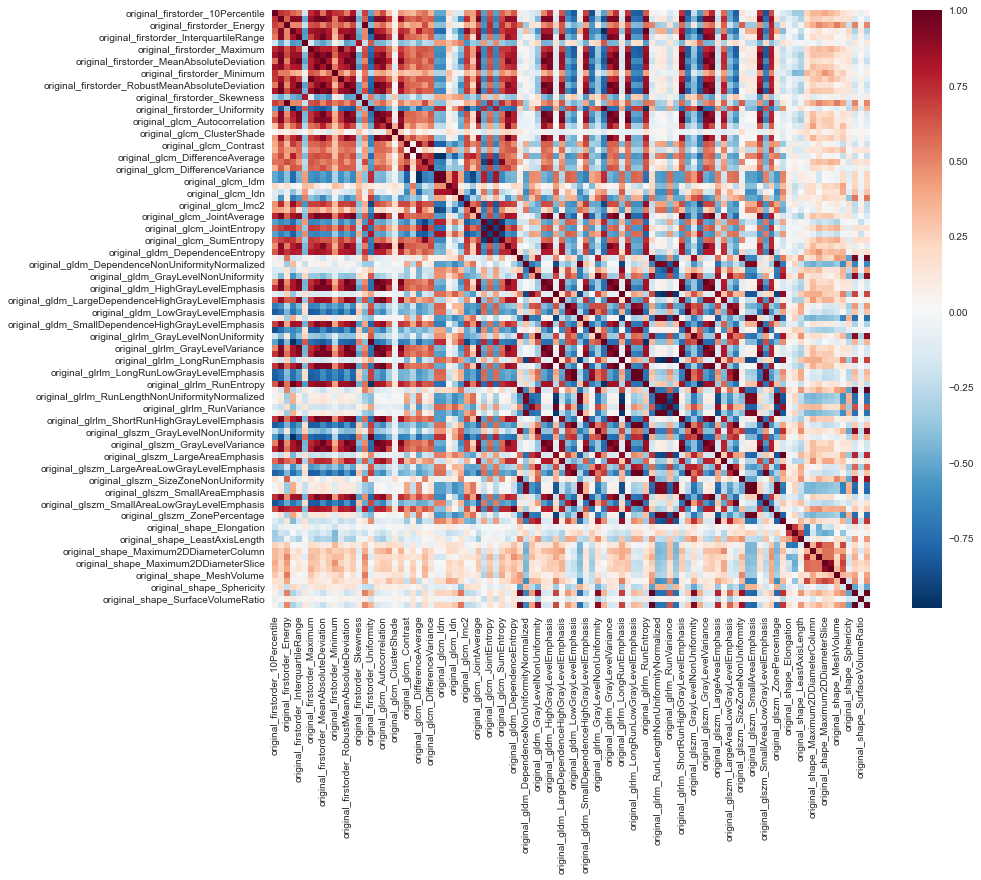

In [12]:
corr = d.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 11))

# Draw the heatmap using seaborn
sns.heatmap(corr, square=True, cmap="RdBu_r")

/Users/giuseppefilitto/miniforge3/envs/sitk/lib/python3.8/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


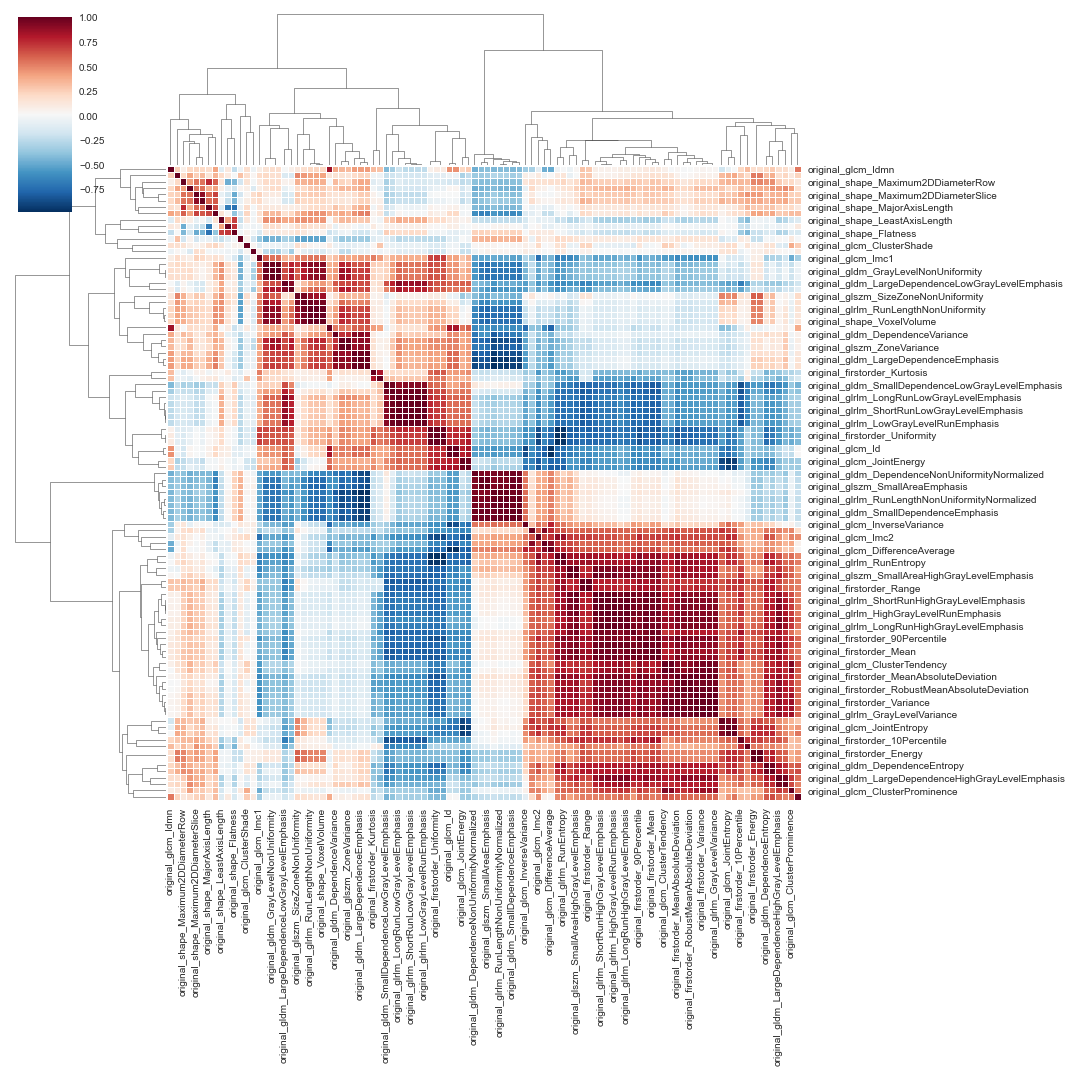

In [13]:
pp = sns.clustermap(d.corr(), linewidths=.6, figsize=(15,15), cmap='RdBu_r')
_ = plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)

plt.show()